In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

from sklearn.model_selection import train_test_split

# Abertura do Arquivo 

In [4]:
df_enem = pd.read_csv('data/MICRODADOS_ENEM_2021.csv', delimiter=';', encoding= 'IBM860')
df_enem.head() 

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,210053865474,2021,5,F,1,1,1,1,3,1,...,A,A,A,B,A,A,B,A,B,B
1,210052384164,2021,12,M,1,1,1,1,11,1,...,A,A,A,B,A,A,C,A,A,A
2,210052589243,2021,13,F,3,1,1,1,15,1,...,B,A,A,B,A,A,C,B,B,B
3,210052128335,2021,3,M,1,3,1,2,0,2,...,A,A,A,B,A,A,B,A,B,B
4,210051353021,2021,2,F,1,3,1,2,0,2,...,B,A,A,B,A,B,E,A,B,B


In [5]:
df_enem.shape

(3389832, 76)

In [6]:
df_enem.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3389832 entries, 0 to 3389831
Data columns (total 76 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   NU_INSCRICAO            int64  
 1   NU_ANO                  int64  
 2   TP_FAIXA_ETARIA         int64  
 3   TP_SEXO                 object 
 4   TP_ESTADO_CIVIL         int64  
 5   TP_COR_RACA             int64  
 6   TP_NACIONALIDADE        int64  
 7   TP_ST_CONCLUSAO         int64  
 8   TP_ANO_CONCLUIU         int64  
 9   TP_ESCOLA               int64  
 10  TP_ENSINO               float64
 11  IN_TREINEIRO            int64  
 12  CO_MUNICIPIO_ESC        float64
 13  NO_MUNICIPIO_ESC        object 
 14  CO_UF_ESC               float64
 15  SG_UF_ESC               object 
 16  TP_DEPENDENCIA_ADM_ESC  float64
 17  TP_LOCALIZACAO_ESC      float64
 18  TP_SIT_FUNC_ESC         float64
 19  CO_MUNICIPIO_PROVA      int64  
 20  NO_MUNICIPIO_PROVA      object 
 21  CO_UF_PROVA             int64  

O nome das colunas será mantido para falicitar a identificaçao no dicionario

In [7]:
#
df_enem.columns

Index(['NU_INSCRICAO', 'NU_ANO', 'TP_FAIXA_ETARIA', 'TP_SEXO',
       'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO',
       'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO',
       'CO_MUNICIPIO_ESC', 'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC',
       'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC',
       'CO_MUNICIPIO_PROVA', 'NO_MUNICIPIO_PROVA', 'CO_UF_PROVA',
       'SG_UF_PROVA', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'TP_PRESENCA_MT', 'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC',
       'CO_PROVA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT',
       'TX_RESPOSTAS_CN', 'TX_RESPOSTAS_CH', 'TX_RESPOSTAS_LC',
       'TX_RESPOSTAS_MT', 'TP_LINGUA', 'TX_GABARITO_CN', 'TX_GABARITO_CH',
       'TX_GABARITO_LC', 'TX_GABARITO_MT', 'TP_STATUS_REDACAO',
       'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4',
       'NU_NOTA_COMP5', 'NU_NOTA_REDACAO', 'Q001', 'Q002', 'Q003', 'Q004',

In [8]:
#Removendo colunas 
df_enem.drop(['NU_INSCRICAO', 'NU_ANO'], axis = 1).head()

,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,5,F,1,1,1,1,3,1,NaN,0,...,A,A,A,B,A,A,B,A,B,B
1,12,M,1,1,1,1,11,1,NaN,0,...,A,A,A,B,A,A,C,A,A,A
2,13,F,3,1,1,1,15,1,NaN,0,...,B,A,A,B,A,A,C,B,B,B
3,3,M,1,3,1,2,0,2,1.0,0,...,A,A,A,B,A,A,B,A,B,B
4,2,F,1,3,1,2,0,2,1.0,0,...,B,A,A,B,A,B,E,A,B,B


# Análise dos Dados

## Informação Sobre os Inscritos

### Sexo

In [9]:
# DataFrame com a proporção de candidatos do sexo Feminino e Masculino
aux_a = df_enem['TP_SEXO'].value_counts(normalize=True).reset_index()
aux_a.columns = ['Sexo', 'Porcentagem']
aux_a['Porcentagem'] = (aux_a['Porcentagem'] * 100).round(2)
aux_a

,Sexo,Porcentagem
0,F,61.67
1,M,38.33


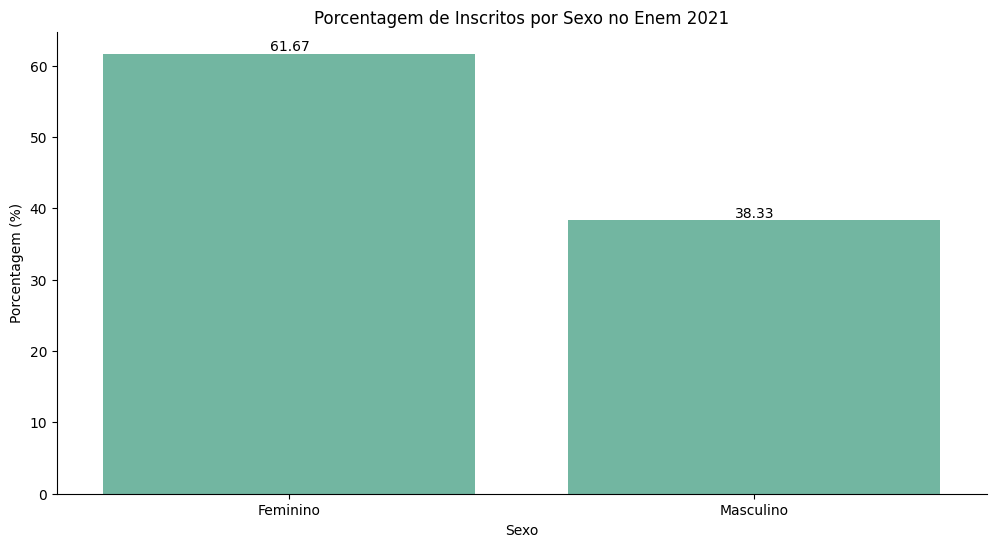

In [10]:
plt.figure(figsize=(12,6))
ax = sns.barplot(x = 'Sexo', y = 'Porcentagem', data=aux_a, color = '#66c2a5')
ax.set(title = 'Porcentagem de Inscritos por Sexo no Enem 2021', 
       xlabel = 'Sexo',
       ylabel = 'Porcentagem (%)')
ax.set_xticklabels(['Feminino', 'Masculino'])
ax.bar_label(ax.containers[0])
sns.despine(top = True, right = True)

plt.show()

### Idade

In [11]:
# colocando todas as pessoas com mais de 51 anos na mesma faixa
df_enem['TP_FAIXA_ETARIA'].replace(to_replace = [17,18,19,20],
                                   value= 16, inplace=True)                                

C:\Users\kakal\AppData\Local\Temp\ipykernel_8600\3834314928.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(range(0,800,100))


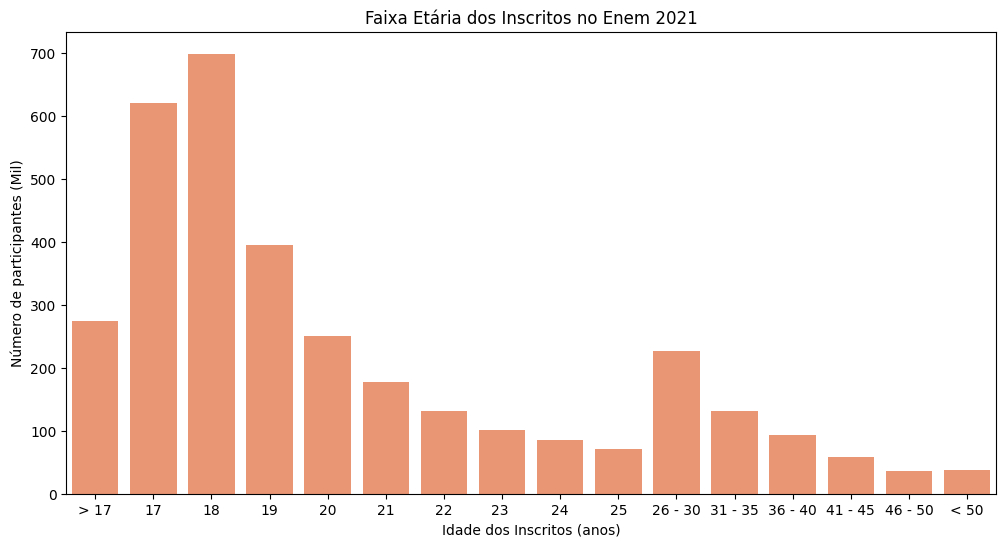

In [12]:
plt.figure(figsize=(12,6))
ax = sns.countplot(x = 'TP_FAIXA_ETARIA', data=df_enem, color = '#fc8d62')
ax.set(title = 'Faixa Etária dos Inscritos no Enem 2021', 
       xlabel = 'Idade dos Inscritos (anos)',
       ylabel = 'Número de participantes (Mil)')
ax.set_xticklabels(['> 17', '17', '18', '19','20', 
                    '21', '22', '23 ','24','25', '26 - 30', 
                    '31 - 35', '36 - 40', 
                    '41 - 45', '46 - 50','< 50'])
ax.set_yticklabels(range(0,800,100))
plt.show()


### Cor/Raça

In [13]:
aux_b = df_enem['TP_COR_RACA'].value_counts(normalize=True).reset_index()
aux_b.columns = ['Categoria', 'Porcentagem']
aux_b['Porcentagem'] = (aux_b['Porcentagem'] * 100).round(2)
aux_b

,Categoria,Porcentagem
0,3,42.99
1,1,40.19
2,2,12.13
3,0,2.10
4,4,2.02
5,5,0.57
6,6,0.00


Excluindo a categoria 6 = Não dispõe da informação, pois ela corresponde a menos de 0,01% dos inscritos

In [14]:
# Excluindo a categoria 6
aux_b.drop(6,axis = 0, inplace=True)

dict_cor_raca = {0: 'Não declarado', 1: 'Branca', 2:'Preta', 3: 'Parda',
                    4: 'Amarela', 5: 'Indígena'}
aux_b.replace(dict_cor_raca, inplace = True)
aux_b

,Categoria,Porcentagem
0,Parda,42.99
1,Branca,40.19
2,Preta,12.13
3,Não declarado,2.10
4,Amarela,2.02
5,Indígena,0.57


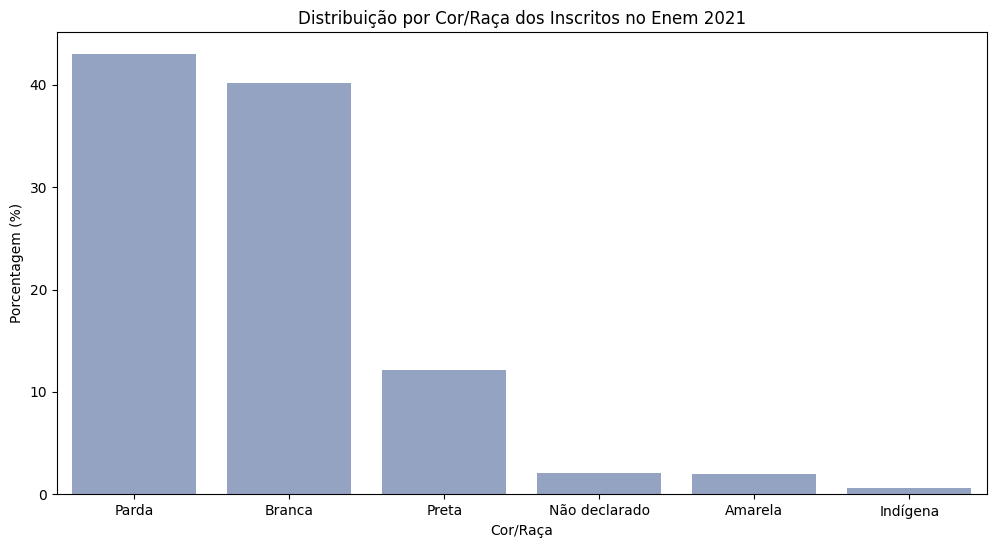

In [15]:
plt.figure(figsize=(12,6))
ax = sns.barplot(x = 'Categoria', y = 'Porcentagem', data=aux_b, color = '#8da0cb')
ax.set(title = 'Distribuição por Cor/Raça dos Inscritos no Enem 2021', 
       xlabel = 'Cor/Raça',
       ylabel = 'Porcentagem (%)')
plt.show()

### Situação e Ano de Conclusão do Ensino Médio

In [16]:
df_em = df_enem[['TP_ANO_CONCLUIU', 'TP_ST_CONCLUSAO']].copy()
df_em

,TP_ANO_CONCLUIU,TP_ST_CONCLUSAO
0,3,1
1,11,1
2,15,1
3,0,2
4,0,2
...,...,...
3389827,0,1
3389828,5,1
3389829,15,1
3389830,4,1


In [17]:
df_em.loc[df_em['TP_ST_CONCLUSAO'] == 2, 'TP_ANO_CONCLUIU'] = '2021'
df_em.loc[df_em['TP_ST_CONCLUSAO'] == 3, 'TP_ANO_CONCLUIU'] = '< 2021'
df_em.loc[df_em['TP_ST_CONCLUSAO'] == 4, 'TP_ANO_CONCLUIU'] = '< 2021'
df_em

,TP_ANO_CONCLUIU,TP_ST_CONCLUSAO
0,3,1
1,11,1
2,15,1
3,2021,2
4,2021,2
...,...,...
3389827,0,1
3389828,5,1
3389829,15,1
3389830,4,1


In [18]:
dict_ensino_medio = {0: 'Não informado', 1: '2020', 2:'2019', 3: '2018',
4: '2017', 5: '2016', 6: '2015', 7: '2014', 8: '2013', 9: '2012', 10: '2011', 
11: '2010', 12: '2009', 13: '2008', 14: '2007', 15: '> 2007'}

df_em['TP_ANO_CONCLUIU'].replace(dict_ensino_medio, inplace = True)
df_em

,TP_ANO_CONCLUIU,TP_ST_CONCLUSAO
0,2018,1
1,2010,1
2,> 2007,1
3,2021,2
4,2021,2
...,...,...
3389827,Não informado,1
3389828,2016,1
3389829,> 2007,1
3389830,2017,1


C:\Users\kakal\AppData\Local\Temp\ipykernel_8600\4097561529.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(range(0,1400,200))


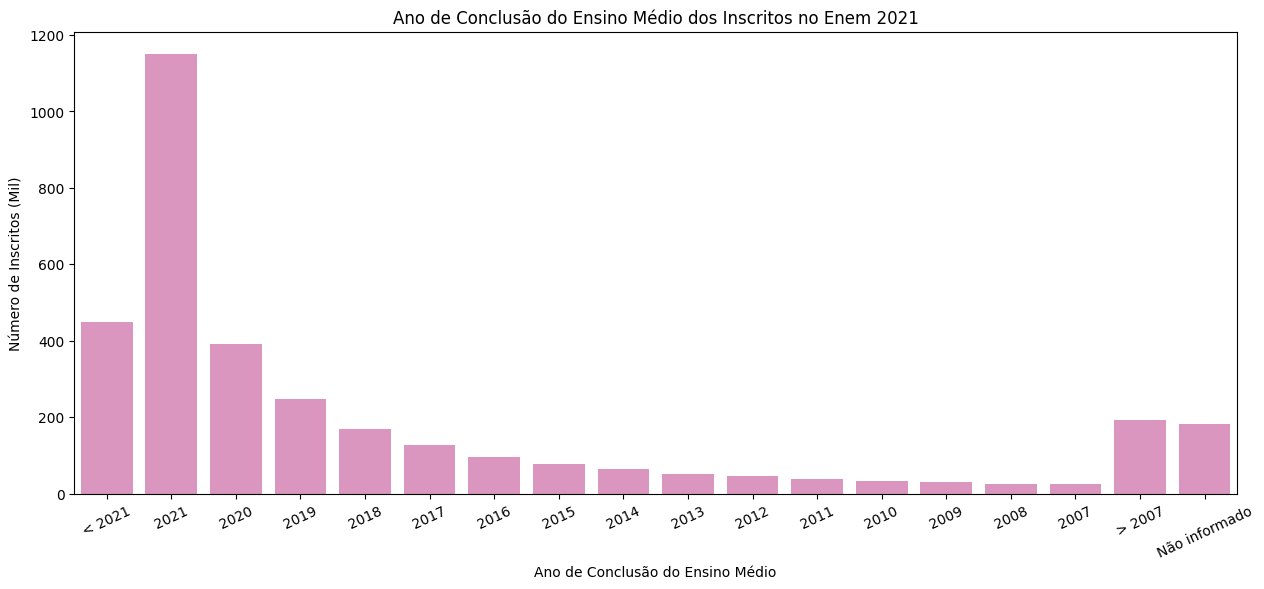

In [19]:
ordem = ['< 2021' ,'2021', '2020', '2019', '2018', '2017', '2016', 
       '2015', '2014', '2013', '2012', '2011', '2010', '2009', '2008', 
       '2007', '> 2007', 'Não informado']

plt.figure(figsize=(15,6))
ax = sns.countplot(x = 'TP_ANO_CONCLUIU', data=df_em, order = ordem, color = '#e78ac3')
ax.set(title = 'Ano de Conclusão do Ensino Médio dos Inscritos no Enem 2021', 
       xlabel = 'Ano de Conclusão do Ensino Médio',
       ylabel = 'Número de Inscritos (Mil)')
ax.set_xticklabels(ordem, rotation = 25)
ax.set_yticklabels(range(0,1400,200))
plt.show()

## Informações sobre a prova

### Estado de Aplicação

C:\Users\kakal\AppData\Local\Temp\ipykernel_8600\2139022994.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(range(0,600,100))


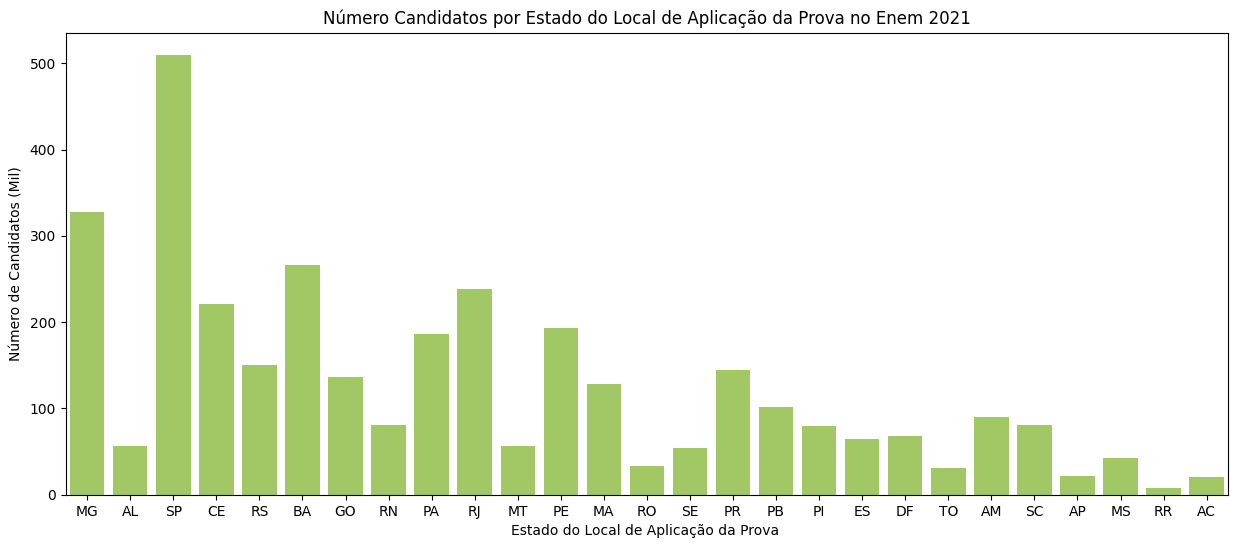

In [20]:
plt.figure(figsize=(15,6))
ax = sns.countplot(x = 'SG_UF_PROVA', data=df_enem, color = '#a6d854')
ax.set(title = 'Número Candidatos por Estado do Local de Aplicação da Prova no Enem 2021', 
       xlabel = 'Estado do Local de Aplicação da Prova ',
       ylabel = 'Número de Candidatos (Mil)')
ax.set_yticklabels(range(0,600,100))
plt.show()

### Abstenções

In [21]:
df_enem[['CO_MUNICIPIO_ESC']].isna().value_counts()

CO_MUNICIPIO_ESC
True                2576026
False                813806
dtype: int64

In [22]:
df_enem[['CO_MUNICIPIO_PROVA']].isna().value_counts()

CO_MUNICIPIO_PROVA
False                 3389832
dtype: int64

A prova do ENEM é realizada em 2 dias. No primeiro dia, temos a aplicação das provas de Linguagens e Códigos, Ciências Humanas e Redação e no segundo dia, Ciências Naturais e Matemática. 

In [23]:
df_abs = df_enem[['CO_MUNICIPIO_ESC', 'CO_MUNICIPIO_PROVA', 'TP_PRESENCA_CN', 
                  'TP_PRESENCA_MT', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC']].copy()
df_abs

,CO_MUNICIPIO_ESC,CO_MUNICIPIO_PROVA,TP_PRESENCA_CN,TP_PRESENCA_MT,TP_PRESENCA_CH,TP_PRESENCA_LC
0,NaN,3144805,0,0,1,1
1,NaN,2704302,1,1,1,1
2,NaN,3515707,0,0,0,0
3,2304202.0,2304202,1,1,1,1
4,2311603.0,2300150,1,1,1,1
...,...,...,...,...,...,...
3389827,NaN,5208707,0,0,0,0
3389828,NaN,4113700,0,0,0,0
3389829,NaN,3304557,0,0,0,0
3389830,NaN,3152501,1,1,1,1


A tabela possuem 2 colunas de presença para cada dia de prova com isso vamos somar o código para saber se existe a possibilidade da pessoa receber presença em somente parte da prova

In [24]:
# Conferindo a presença no mesmo dia
df_abs['PRESENCA_DIA_2'] = df_abs['TP_PRESENCA_CN'] + df_abs['TP_PRESENCA_MT']
df_abs['PRESENCA_DIA_1'] = df_abs['TP_PRESENCA_CH'] + df_abs['TP_PRESENCA_LC']
df_abs.head()

,CO_MUNICIPIO_ESC,CO_MUNICIPIO_PROVA,TP_PRESENCA_CN,TP_PRESENCA_MT,TP_PRESENCA_CH,TP_PRESENCA_LC,PRESENCA_DIA_2,PRESENCA_DIA_1
0,NaN,3144805,0,0,1,1,0,2
1,NaN,2704302,1,1,1,1,2,2
2,NaN,3515707,0,0,0,0,0,0
3,2304202.0,2304202,1,1,1,1,2,2
4,2311603.0,2300150,1,1,1,1,2,2


Como não observamos nenhuma pessoa com soma 3 podemos concluir que somente uma coluna por dia é suficiente para marcar a presença

In [25]:
df_abs['PRESENCA_DIA_1'].value_counts().reset_index()

,index,PRESENCA_DIA_1
0,2,2378379
1,0,1007397
2,4,4056


In [26]:
df_abs['PRESENCA_DIA_2'].value_counts().reset_index()

,index,PRESENCA_DIA_2
0,2,2245844
1,0,1142539
2,4,1449


In [27]:
dict_presenca = {0: 'Ausente', 2: 'Presente', 4: 'Eliminado'}
df_abs[['PRESENCA_DIA_1', 'PRESENCA_DIA_2']] = df_abs[['PRESENCA_DIA_1', 'PRESENCA_DIA_2']].replace(dict_presenca)
df_abs.head()

,CO_MUNICIPIO_ESC,CO_MUNICIPIO_PROVA,TP_PRESENCA_CN,TP_PRESENCA_MT,TP_PRESENCA_CH,TP_PRESENCA_LC,PRESENCA_DIA_2,PRESENCA_DIA_1
0,NaN,3144805,0,0,1,1,Ausente,Presente
1,NaN,2704302,1,1,1,1,Presente,Presente
2,NaN,3515707,0,0,0,0,Ausente,Ausente
3,2304202.0,2304202,1,1,1,1,Presente,Presente
4,2311603.0,2300150,1,1,1,1,Presente,Presente


In [28]:
aux_c = pd.concat([df_abs['PRESENCA_DIA_1'].value_counts(normalize=True), 
                   df_abs['PRESENCA_DIA_2'].value_counts(normalize=True)], 
                   axis = 1).reset_index() 
aux_c.columns = ['Situacao', 'Dia_1','Dia_2']
aux_c

,Situacao,Dia_1,Dia_2
0,Presente,0.701621,0.662524
1,Ausente,0.297182,0.337049
2,Eliminado,0.001197,0.000427


In [29]:
aux_c = pd.melt(aux_c, id_vars= 'Situacao', var_name='Dia', value_name='Porcentagem')
aux_c['Porcentagem'] = (aux_c['Porcentagem'] * 100).round(2)
aux_c 

,Situacao,Dia,Porcentagem
0,Presente,Dia_1,70.16
1,Ausente,Dia_1,29.72
2,Eliminado,Dia_1,0.12
3,Presente,Dia_2,66.25
4,Ausente,Dia_2,33.70
5,Eliminado,Dia_2,0.04


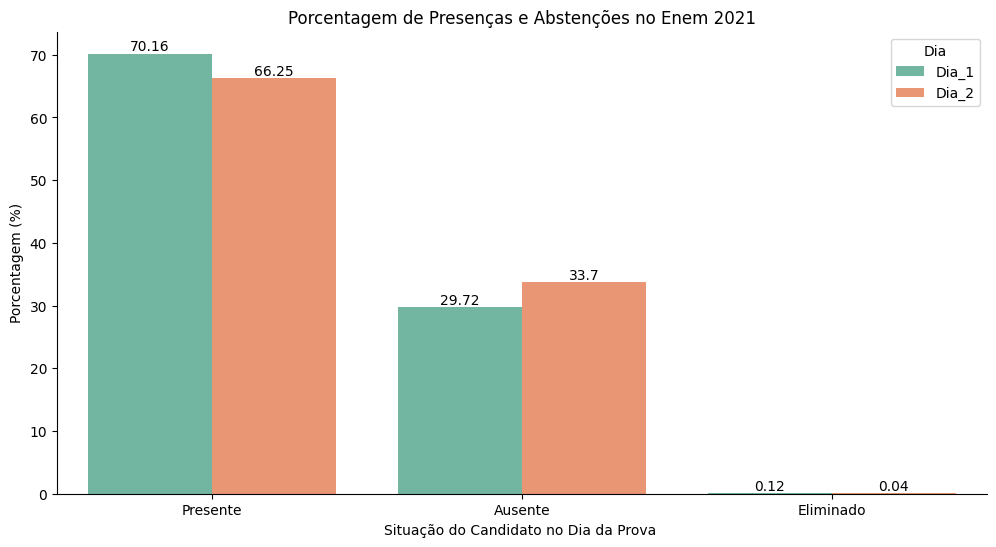

In [30]:
plt.figure(figsize=(12,6))

ax = sns.barplot(x = 'Situacao', y = 'Porcentagem', hue = 'Dia', data = aux_c, palette = 'Set2')
ax.set(title = 'Porcentagem de Presenças e Abstenções no Enem 2021', 
       xlabel = 'Situação do Candidato no Dia da Prova ',
       ylabel = 'Porcentagem (%)')

ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])

sns.despine(top = True, right = True)

plt.show()

### Notas das Provas

In [31]:
notas = df_enem[['NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_CN', 'NU_NOTA_REDACAO']]
notas.head()

,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_CN,NU_NOTA_REDACAO
0,574.6,472.6,NaN,NaN,760.0
1,551.8,498.3,461.5,505.9,560.0
2,NaN,NaN,NaN,NaN,NaN
3,678.9,638.9,659.5,580.7,780.0
4,532.4,457.6,582.6,497.7,780.0


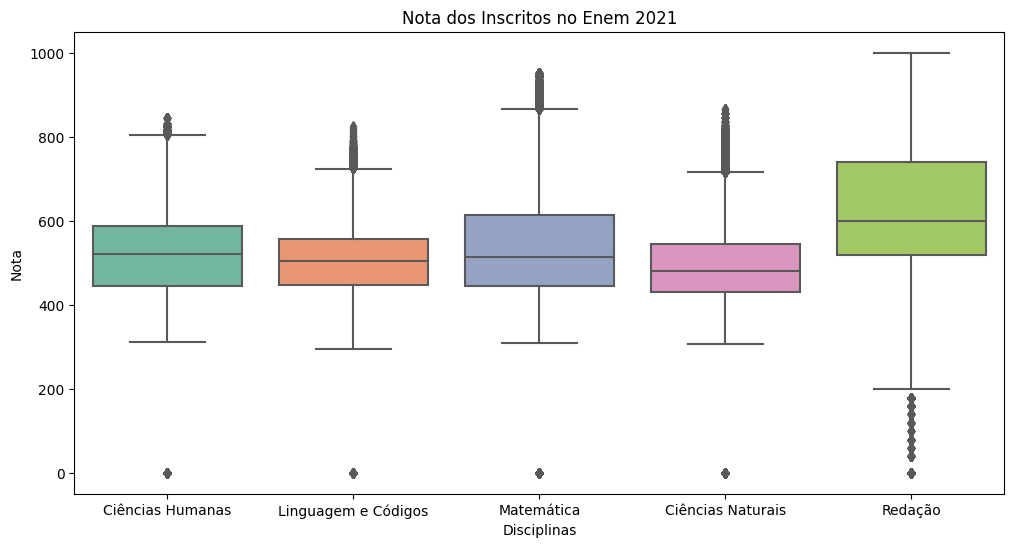

In [32]:
plt.figure(figsize=(12,6))
ax = sns.boxplot(data = notas, palette="Set2")
ax.set(title = 'Nota dos Inscritos no Enem 2021', 
       xlabel = 'Disciplinas',
       ylabel = 'Nota')
ax.set_xticklabels(['Ciências Humanas', 
                   'Linguagem e Códigos', 'Matemática', 'Ciências Naturais', 'Redação'])
plt.show()

In [33]:
#Criando a coluna com a média das notas
notas['MEDIA_NOTA'] = (notas['NU_NOTA_CN'] + notas['NU_NOTA_CH'] + 
                       notas['NU_NOTA_LC'] + notas['NU_NOTA_MT'] + 
                       notas['NU_NOTA_REDACAO'])/5

#Removendo as linhas sem notas
notas = notas.dropna()
 
notas.head()

C:\Users\kakal\AppData\Local\Temp\ipykernel_8600\3882554538.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  notas['MEDIA_NOTA'] = (notas['NU_NOTA_CN'] + notas['NU_NOTA_CH'] +


,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_CN,NU_NOTA_REDACAO,MEDIA_NOTA
1,551.8,498.3,461.5,505.9,560.0,515.50
3,678.9,638.9,659.5,580.7,780.0,667.60
4,532.4,457.6,582.6,497.7,780.0,570.06
8,476.5,450.7,493.4,487.4,520.0,485.60
9,539.2,494.6,413.3,507.6,380.0,466.94


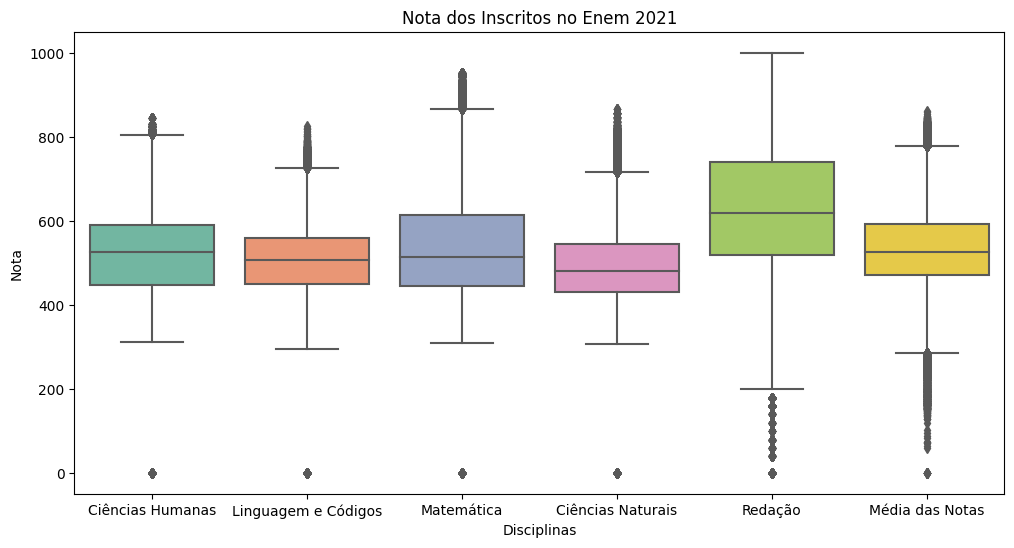

In [34]:
plt.figure(figsize=(12,6))
ax = sns.boxplot(data = notas, palette="Set2")
ax.set(title = 'Nota dos Inscritos no Enem 2021', 
       xlabel = 'Disciplinas',
       ylabel = 'Nota')
ax.set_xticklabels(['Ciências Humanas', 
                   'Linguagem e Códigos', 'Matemática', 'Ciências Naturais', 'Redação', 'Média das Notas'])
plt.show()

# Hipoteses

#### H1: Alunos que realizam a prova em um município diferente do qual a escola está localizada tem uma maior abstenção maior que a média

In [35]:
df_abs = df_abs.drop(['TP_PRESENCA_CN', 'TP_PRESENCA_MT', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC'], axis = 1)
df_abs.dropna(inplace=True)
df_abs.head()

,CO_MUNICIPIO_ESC,CO_MUNICIPIO_PROVA,PRESENCA_DIA_2,PRESENCA_DIA_1
3,2304202.0,2304202,Presente,Presente
4,2311603.0,2300150,Presente,Presente
14,2927408.0,2927408,Ausente,Ausente
33,2932606.0,2932606,Presente,Presente
45,3203502.0,3204104,Presente,Presente


In [54]:
df_cidade_igual = df_abs[df_abs['CO_MUNICIPIO_ESC'] == df_abs['CO_MUNICIPIO_PROVA']]
df_cidade_igual = pd.concat([df_cidade_igual['PRESENCA_DIA_1'].value_counts(normalize = True, ),
                            df_cidade_igual['PRESENCA_DIA_2'].value_counts(normalize = True)],
                            axis = 1).reset_index()
df_cidade_igual['Cidades'] = 'Iguais'

df_cidade_igual = pd.melt(df_cidade_igual, 
                        id_vars = ['index', 'Cidades'], 
                        value_vars= ['PRESENCA_DIA_1', 'PRESENCA_DIA_2'] , 
                        var_name= 'Dia')

df_cidade_igual['Dia'].replace({'PRESENCA_DIA_1': 1, 
                            'PRESENCA_DIA_2':2}, 
                            inplace = True)
                  
df_cidade_igual

,index,Cidades,Dia,value
0,Presente,Iguais,1,0.790609
1,Ausente,Iguais,1,0.207992
2,Eliminado,Iguais,1,0.001399
3,Presente,Iguais,2,0.754625
4,Ausente,Iguais,2,0.244877
5,Eliminado,Iguais,2,0.000497


In [56]:
df_cidade_diferente = df_abs[df_abs['CO_MUNICIPIO_ESC'] != df_abs['CO_MUNICIPIO_PROVA']]
df_cidade_diferente = pd.concat([df_cidade_diferente['PRESENCA_DIA_1'].value_counts(normalize = True, ),
                            df_cidade_diferente['PRESENCA_DIA_2'].value_counts(normalize = True)],
                            axis = 1).reset_index()
df_cidade_diferente['Cidades'] = 'Diferentes'

df_cidade_diferente = pd.melt(df_cidade_diferente, 
                        id_vars = ['index', 'Cidades'], 
                        value_vars= ['PRESENCA_DIA_1', 'PRESENCA_DIA_2'] , 
                        var_name= 'Dia')


df_cidade_diferente['Dia'].replace({'PRESENCA_DIA_1': 1, 
                                    'PRESENCA_DIA_2':2}, 
                                    inplace = True)
df_cidade_diferente

,index,Cidades,Dia,value
0,Presente,Diferentes,1,0.718692
1,Ausente,Diferentes,1,0.280015
2,Eliminado,Diferentes,1,0.001293
3,Presente,Diferentes,2,0.687258
4,Ausente,Diferentes,2,0.312249
5,Eliminado,Diferentes,2,0.000493


In [76]:
df_cidades = pd.concat([df_cidade_diferente, df_cidade_igual], axis = 0)
df_cidades

,index,Cidades,Dia,value
0,Presente,Diferentes,1,0.718692
1,Ausente,Diferentes,1,0.280015
2,Eliminado,Diferentes,1,0.001293
3,Presente,Diferentes,2,0.687258
4,Ausente,Diferentes,2,0.312249
5,Eliminado,Diferentes,2,0.000493
0,Presente,Iguais,1,0.790609
1,Ausente,Iguais,1,0.207992
2,Eliminado,Iguais,1,0.001399
3,Presente,Iguais,2,0.754625


In [77]:
df_cidades[df_cidades['Dia'] == 1]

,index,Cidades,Dia,value
0,Presente,Diferentes,1,0.718692
1,Ausente,Diferentes,1,0.280015
2,Eliminado,Diferentes,1,0.001293
0,Presente,Iguais,1,0.790609
1,Ausente,Iguais,1,0.207992
2,Eliminado,Iguais,1,0.001399


In [ ]:
wspace=0.0, hspace=0.0

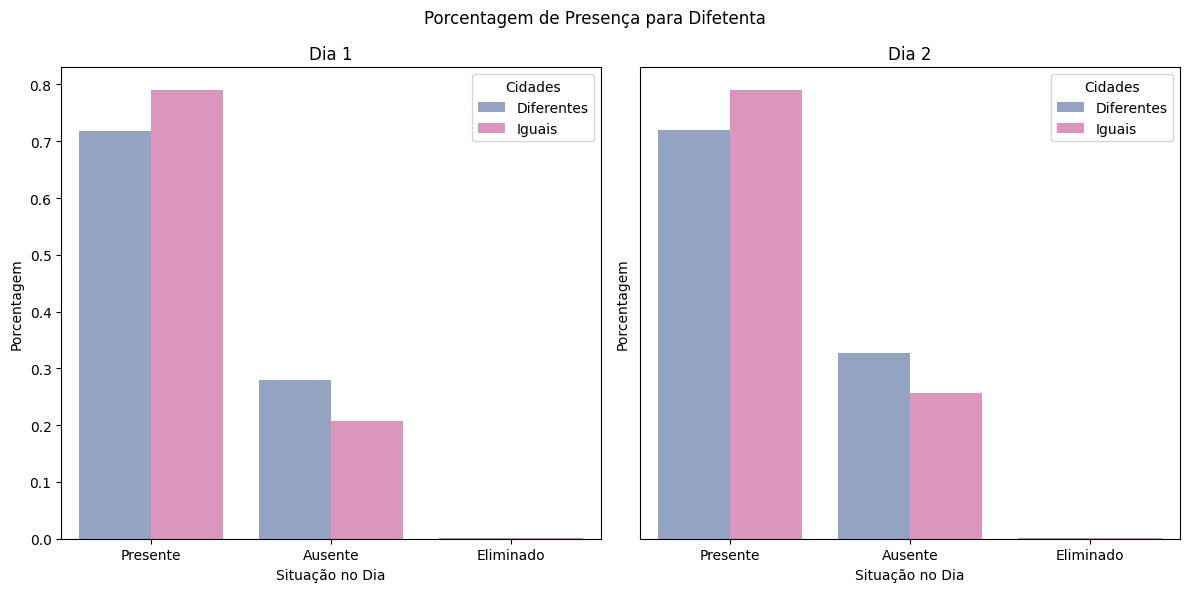

In [111]:
fig, (ax1, ax2) = plt.subplots( 1,2, 
                                figsize = (12,6),
                                sharey = True)

fig.suptitle('Porcentagem de Presença para Difetenta')

sns.barplot(x = 'index', 
            y = 'value', 
            hue = 'Cidades', 
            data =df_cidades[df_cidades['Dia'] == 1], 
            ax = ax1,
            palette = ('#8da0cb', '#e78ac3'))

ax1.set(title = 'Dia 1',
        ylabel = 'Porcentagem',
        xlabel = 'Situação no Dia')

sns.barplot(x = 'index', 
            y = 'value', 
            hue = 'Cidades', 
            data = df_cidades[df_cidades['Dia'] == 2], 
            ax = ax2,
            palette = ('#8da0cb', '#e78ac3'))

ax2.set(title = 'Dia 2',
        ylabel = 'Porcentagem',
        xlabel = 'Situação no Dia')
#ax2.set_yticks([])

plt.tight_layout()
plt.show()

#### H2: Candidatos com menor renda apresentam maior abstenção

#### H3: Alunos com acesso a internet possuem uma melhor pontuação média na prova

In [ ]:
df_enem['MEDIA_NOTA'] = (df_enem['NU_NOTA_CN'] + df_enem['NU_NOTA_CH'] + 
                        df_enem['NU_NOTA_LC'] + df_enem['NU_NOTA_MT'] + 
                        df_enem['NU_NOTA_REDACAO'])/5

In [ ]:
aux_f = df_enem[['MEDIA_NOTA', 'Q025']].groupby('Q025', as_index=False).mean()
aux_f

,Q025,MEDIA_NOTA
0,A,478.12776
1,B,540.84705


<AxesSubplot: xlabel='Q025', ylabel='MEDIA_NOTA'>

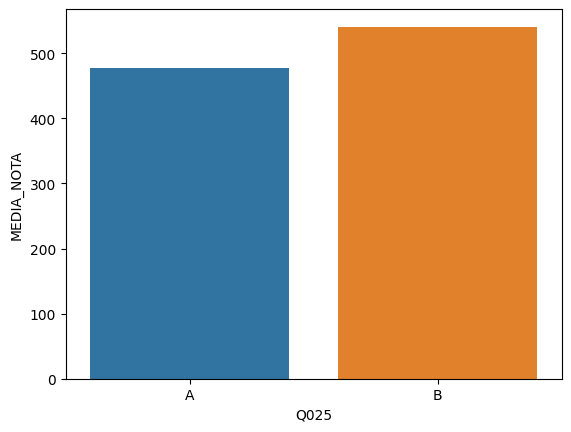

In [ ]:
sns.barplot(x = 'Q025', y = 'MEDIA_NOTA', data=aux_f)

#### H4: Candidatos recém formados no ensimo médio apresentam a média das notas maior

#### H5: Candidatos que realizam a prova física tem um desempenho maior que os respondem a versão digital

# Machine Leaning

Vamos utilizar as notas obtidas pelos alunos em Linguagem e Códigos, Matemática, Ciências Humanas, Redação, para prever a nota em Ciencias da Natureza

In [ ]:
df_ml = df_enem[['NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO', 'NU_NOTA_CN', 'MEDIA_NOTA']]
df_ml = df_ml.dropna()

In [ ]:
X =  df_enem[['NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO', 'MEDIA_NOTA']]
y = df_enem['NU_NOTA_CN']

In [ ]:
SEED = 123

X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    train_size=0.7,
                                                    shuffle=True,
                                                    random_state=SEED)

print(X_train.shape[0])
print(y_test.shape[0])

2372882
1016950


In [ ]:
# Escalonando os dados
